In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zillow = pd.read_csv("data/County_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_mon.csv")
nyt = pd.read_csv("data/us.csv")

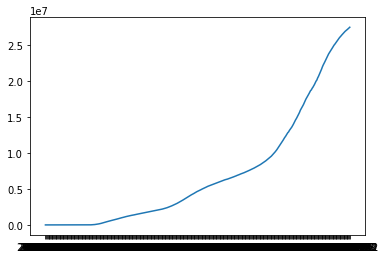

In [32]:
plt.plot(nyt["date"], nyt["cases"])

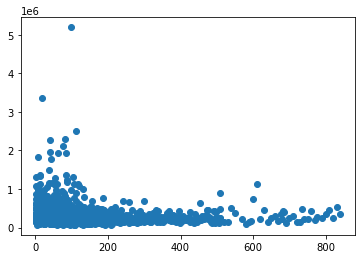

In [29]:
plt.scatter(zillow["MunicipalCodeFIPS"], zillow["2020-01-31"])

In [13]:
print("The above graph depicts home prices before the spike in COVID-19 cases in the USA. In the graph, we see the ZHVI (Zillow Home Value Index) for each county on 1/31/2020. Counties are designated by FIPS code. This plot shows that, despite some outliers, a vast majority of counties have similar ZHVI's.")

The above graph depicts home prices before the spike in COVID-19 cases in the USA. In the graph, we see the ZHVI (Zillow Home Value Index) for each county on 1/31/2020. Counties are designated by FIPS code. This plot shows that, despite some outliers, a vast majority of counties have similar ZHVI's.


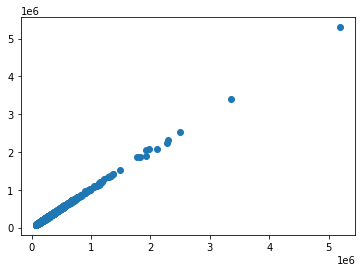

In [30]:
plt.scatter(zillow["2020-01-31"], zillow["2020-08-31"])

In [31]:
print("The above graph depicts ZHVI values for all counties before and after the spike (x: 1/31/202 and y: 8/31/2020). As a straight line with slope roughly = 1, the graph doesn't suggest much of a disparity between the home values after the spike.")

The above graph depicts ZHVI values for all counties before and after the spike (x: 1/31/202 and y: 8/31/2020). As a straight line with slope roughly = 1, the graph doesn't suggest much of a disparity between the home values after the spike.


In [4]:
zillow

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1996-01-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,319403.0,...,1171699.0,1179615.0,1182173.0,1183746.0,1193130.0,1206653.0,1221427.0,1231945.0,1241930.0,1251102.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,277277.0,...,431065.0,431325.0,431812.0,432566.0,434374.0,436720.0,440214.0,443843.0,446943.0,449780.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,192648.0,...,346758.0,348288.0,349549.0,350562.0,351984.0,353835.0,356809.0,359658.0,363318.0,366981.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,191006.0,...,472634.0,477836.0,482528.0,486856.0,491213.0,497178.0,504393.0,512222.0,520462.0,528966.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,299083.0,...,963754.0,968051.0,973721.0,977559.0,983139.0,992384.0,1006359.0,1021971.0,1037195.0,1052488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,425,3101,Camas County,County,ID,ID,Hailey,16,25,NaN,...,223114.0,225444.0,228186.0,229419.0,231124.0,232994.0,235189.0,237165.0,237244.0,237715.0
2855,1648,3102,Daggett County,County,UT,UT,NaN,49,9,NaN,...,292976.0,294077.0,294989.0,296075.0,297181.0,298895.0,301244.0,303684.0,307264.0,310621.0
2856,2345,3112,Hinsdale County,County,CO,CO,NaN,8,53,NaN,...,551744.0,551353.0,551551.0,552371.0,554949.0,557373.0,559433.0,562150.0,565962.0,570471.0
2857,1933,3122,Mineral County,County,CO,CO,NaN,8,79,NaN,...,429918.0,432476.0,435223.0,436603.0,438891.0,441720.0,445219.0,449526.0,454735.0,459912.0
